# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [63]:
# Import libraries necessary for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [64]:
# Display a description of the dataset
display(data.describe())
# data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,514,8323,6869,529,93,1040
1,13624,295,1381,890,43,84
2,12205,12697,28540,869,12034,1009


Sample '272':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,514.000000,8323.000000,6869.000000,529.000000,93.000000,1040.000000
MEAN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
DIFF,-11486.297727,2526.734091,-1082.277273,-2542.931818,-2788.493182,-484.870455
DIFF_PERC,-95.716773,43.592446,-13.611364,-82.779566,-96.772507,-31.797485


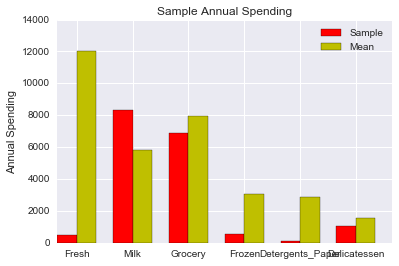

Sample '191':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,13624.000000,295.000000,1381.000000,890.000000,43.000000,84.000000
MEAN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
DIFF,1623.702273,-5501.265909,-6570.277273,-2181.931818,-2838.493182,-1440.870455
DIFF_PERC,13.530517,-94.910516,-82.631721,-71.028003,-98.507718,-94.491335


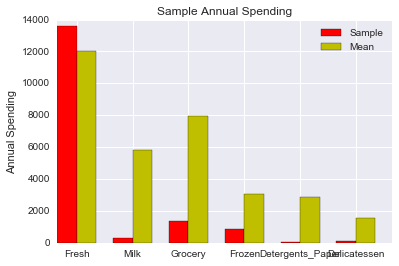

Sample '77':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,12205.000000,12697.000000,28540.000000,869.000000,12034.000000,1009.000000
MEAN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
DIFF,204.702273,6900.734091,20588.722727,-2202.931818,9152.506818,-515.870455
DIFF_PERC,1.705810,119.054823,258.936043,-71.711612,317.630695,-33.830445


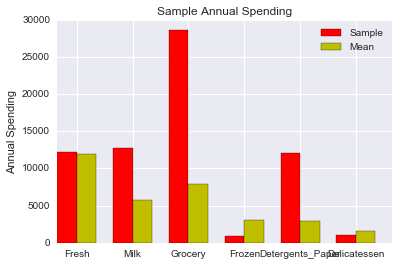

In [65]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#import random 
#indices = []
#for x in range(0, 3):
#     indices.append(random.randint(0,data.shape[0]))

indices = [272, 191, 77]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import matplotlib.pyplot as pl

for index in indices:

    print "Sample '{}':".format(index)
    agg_data = pd.DataFrame(columns=data.keys())
    agg_data.loc['SAMPLE'] = data.loc[index]
    agg_data.loc['MEAN'] = data.describe().loc['mean']
    agg_data.loc['DIFF'] = agg_data.loc['SAMPLE']-agg_data.loc['MEAN']
    agg_data.loc['DIFF_PERC'] = 100*agg_data.loc['DIFF']/agg_data.loc['MEAN']
    display(agg_data)

    N = 6
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, agg_data.loc['SAMPLE'], width, color='r')
    rects2 = ax.bar(ind + width, agg_data.loc['MEAN'], width, color='y')


    # add some text for labels, title and axes ticks
    ax.set_ylabel('Annual Spending')
    ax.set_title('Sample Annual Spending')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(samples.keys())

    ax.legend((rects1[0], rects2[0]), ('Sample', 'Mean'))

    plt.show()

    

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
272    6.2  80.2     61.4    18.9               9.2          53.2
191   68.6   1.8     10.0    32.0               3.2           6.1
77    64.8  90.7     96.8    30.9              95.0          52.0


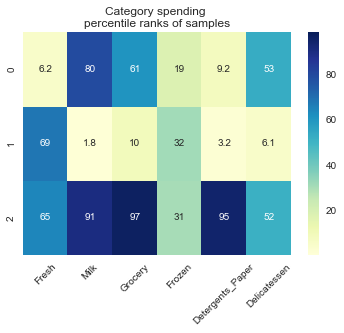

In [66]:
# snippet given in the first review :D 

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
_ = sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=1, vmax=99, cmap='YlGnBu')
plt.title('Category spending \npercentile ranks of samples')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**:

Comparing values over the mean.

**Sample 1 (index 272):**

Fresh: -96%

Milk: +44%

Grocery: -13%

Frozen: -83%

Detergent_Paper: -97%

Delicatessen: -32%

This customer spends the most part of his budget in Milk, Grocery and Deli. It seems like this could be a Café with some eatable products or with some delicatessen products available to buy.

**Sample 2 (index 191):**

Fresh: +14%

Milk: -95%

Grocery: -83%

Frozen: -71%

Detergent_Paper: -99%

Delicatessen: -94%

In this case the greatest budget is the Fresh one and this customer also spends money in Frozen and Grocery products. This could be, for instance, a vegetarian restaurant or a juice shop. 

**Sample 3 (index 77):**

Fresh: +2%

Milk: 119%

Grocery: +259%

Frozen: -72%

Detergent_Paper: 318%

Delicatessen: -33%

This one spends a huge amount of money in Milk, Grocery and Detergent_Paper. Besides that, he spends an important amount in other kind of products so he could be a retailer who, in general, needs to have all type of these products in his shop.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [67]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
selected_feature = 'Grocery'
new_data = data.copy()
new_data.drop(selected_feature, axis = 1, inplace = True)

#display(new_data.head())
#display(data.head())

#print len(x_array)
#print len(y_array)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.681884008544


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**: 

I've tried with different features and only "Grocery" and "Detergents_Paper" have some positive score as it is shown.

In this case, "Grocery" is selected and its score is about **68%**.

It is possible that this feature could be predicted with relative precision from the other ones. That could mean that it is possible to filter and remove that feature without losing information

However that statement might not be true. At this moment it's not analyzed if the final score could has been affected by this filtering. 

Maybe it is irrelevant or "weakly relevant" but it's hard to say that just removing it, we are not going to lose information or get worse performance of the model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

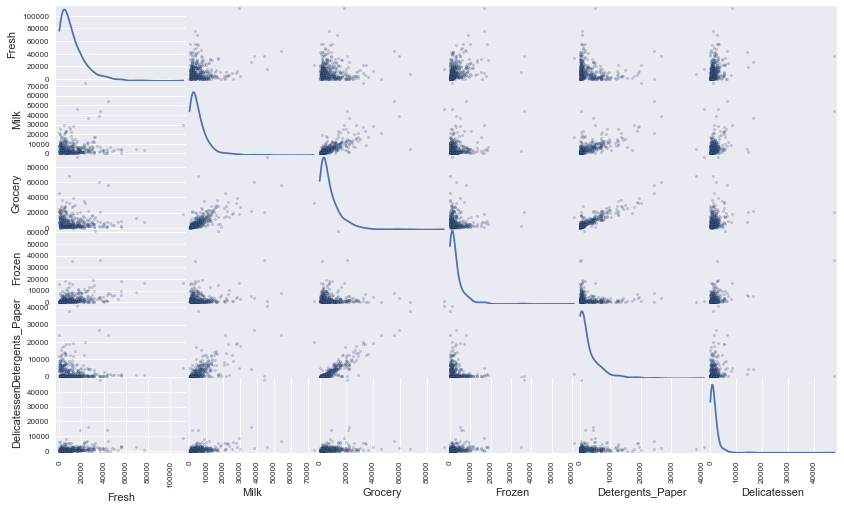

In [68]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

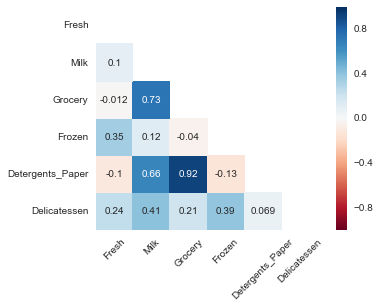

In [69]:
# snippet given in the first review :D 

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    plt.xticks(rotation=45, ha='center');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**: It is clear that there is a correlation between "Grocery" and "Detergents_Paper" because both features show a linear relation between them.

It can be also seen that "Grocery" and "Milk" are correlated like "Milk" and "Detergents_Paper" are. But the most important degree of correlation is defined by "Grocery" and "Detergents_Paper"

That confirms that the relevance of "Grocery" feature could be low, but it cannot be said yet that this feature is just **not necessary**.

The distribution has a **positive skew or is "right-tailed"**. The mass of the distribution is concentrated on the left of the figure.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

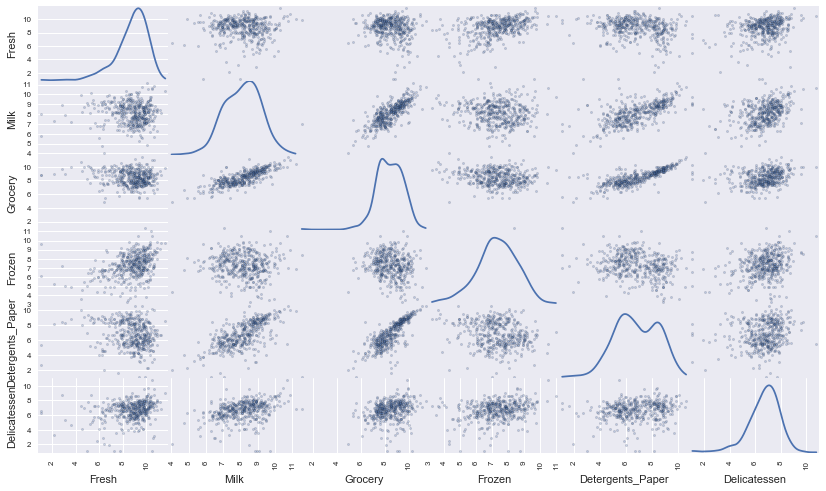

In [70]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [71]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.242223,9.026778,8.834774,6.270988,4.532599,6.946976
1,9.519588,5.686975,7.230563,6.791221,3.761200,4.430817
2,9.409601,9.449121,10.259062,6.767343,9.395491,6.916715


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Sample '65':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
MEAN,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133


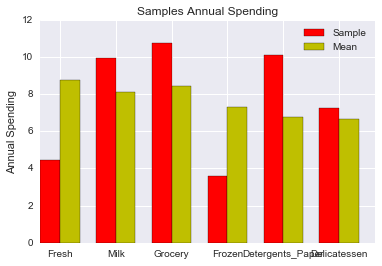

Sample '66':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
MEAN,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133


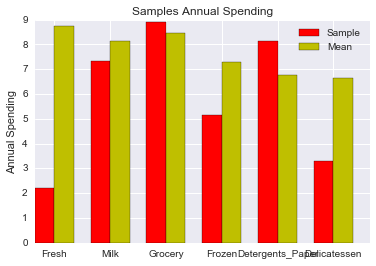

Sample '75':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
MEAN,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133


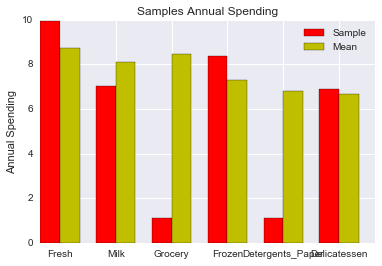

Sample '128':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
MEAN,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133


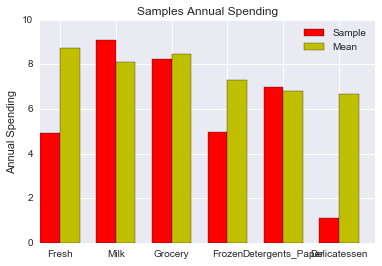

Sample '154':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
MEAN,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133


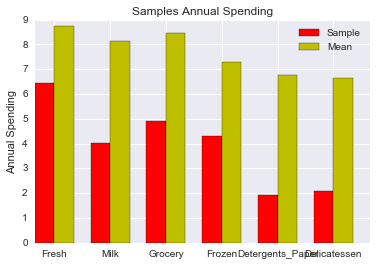

In [72]:
# For each feature find the data points with extreme high or low values

for feature in log_data.keys():
        
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [65, 66, 75, 128, 154]

for outlier in outliers:
    
    print "Sample '{}':".format(outlier)
    agg_data = pd.DataFrame(columns=log_data.keys())
    agg_data.loc['SAMPLE'] = log_data.loc[outlier]
    agg_data.loc['MEAN'] = log_data.describe().loc['mean']
    display(agg_data)

    N = 6
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, agg_data.loc['SAMPLE'], width, color='r')
    rects2 = ax.bar(ind + width, agg_data.loc['MEAN'], width, color='y')


    # add some text for labels, title and axes ticks
    ax.set_ylabel('Annual Spending')
    ax.set_title('Samples Annual Spending')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(samples.keys())

    ax.legend((rects1[0], rects2[0]), ('Sample', 'Mean'))

    plt.show()

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**:

Data points [65, 66, 75, 128, 154] are considered outliers for more than one feature.

Outliers detection and removal is very important in any kind of ML problem. In this case, all outliers detected in more than one feature are removed from the list.

In general when outliers are detected there is no reason not to remove them. The detection method was just a statistical rule but could has been another kind of reasonable method with the main objective of improve the performance of the final model. 

However it is recommended to try and test how the final score is affected every time that an outlier is removed from the dataset. 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

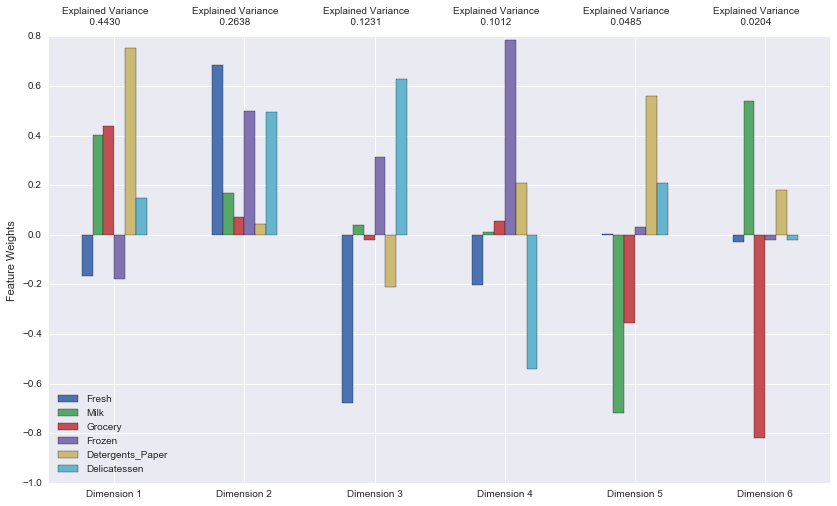

In [73]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**:

The total variance for the first and second principal component is: 0.4430 + 0.2638 that is in percentage **70.7%** approximately.

The same calculation for the first four PC is: 0.4430 + 0.2638 + 0.1231 + 0.1012 that is **93.1%** approximately.

First PC: Strong positive weight of Detergent_Paper, Milk and Grocery. Delicatessen is also positively described in this PC and it has negative contributions of Fresh and Frozen features. It represents a common spending for a retailer. It can be seen that kind of distribution in Sample 2.

Second PC: All weights are positive and Fresh, Frozen and Deli are the most relevant. A common spending for a restaurant which needs that kind of products for its main business activity (serve meals) but needs Detergents and Paper, Milk, and in general all kind of these products.

Third PC: In this case the most important postive spending are Delicatessen and Frozen. This PC also has a meaningful negative weights on Fresh and Detergents_Paper. This could represent a particular type of shop or gourmet restaurant.

Fourth PC: The fourth one has a significant positive weight on Frozen, with relevant negative weights on Delicatessen and Fresh. This could define a fast food restaurant or a frozen food shop for instance.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [74]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5299,-2.0536,2.0455,-0.8916,-2.0329,-0.1451
1,-4.1718,-1.4932,-1.5318,-0.0817,0.0082,-0.8302
2,3.2943,0.7303,-1.0030,-0.0283,-0.1102,-0.3007


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [75]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [76]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.5299,-2.0536
1,-4.1718,-1.4932
2,3.2943,0.7303


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means algorithm is widely used in clustering problems because of his simplicity and computational cost. It tends to be faster (in terms of computational cost) than GMM. Is scalable and works well with any cluster sizes. However, K-Means performance gets worse with a high number of expected clusters.

GMM is based on soft clustering and in general it gives you more confidence about the results. It is more complex than K-Means but it provides the probabilities of being part of a particular cluster which is an important feature in real-world problems.

K-means can be more efficient but it is just like the first attempt to find the BOC. It is simpler and cheaper and it should be the first step in a clustering problem. However, GMM is more complex and can give you a better performance in some problems that are not easily classified by hard clustering.

Based on the number of clusters expected (less than 6), the PC analysis and the total explained variance of the first four PC it can be enough selecting the K-Means clustering method to get a good performance.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [77]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.grid_search import GridSearchCV

#clusters_list = [2,3,4,5,6,7,8,9,10,12,14,16,18,20,30,40,50]
#scores=[]

#for clusters in clusters_list:
    
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2).fit(reduced_data)
#clusterer = GMM(n_components=clusters).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
#scores.append(score)

print score
    
#plt.plot(clusters_list, scores)

0.426281015469


7 clusters: 0.36332
6 clusters: 0.36661
5 clusters: 0.35099
4 clusters: 0.33201
3 clusters: 0.39689
2 clusters: 0.42628


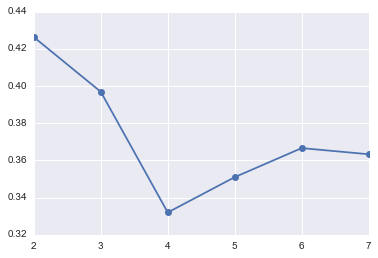

In [78]:
#keep the scores for each cluster size
sil_scores = []

for i in range(7,1,-1):
    clusterer = KMeans(i, random_state=0).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    sil_scores.append(score)
    print i, 'clusters:', score.round(5)

# plot the scores
import matplotlib.pyplot as plt
_ = plt.plot(np.arange(7,1,-1), sil_scores, '-o')

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**: The best Silhouette score is approximately 0.42 (with 2 clusters)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

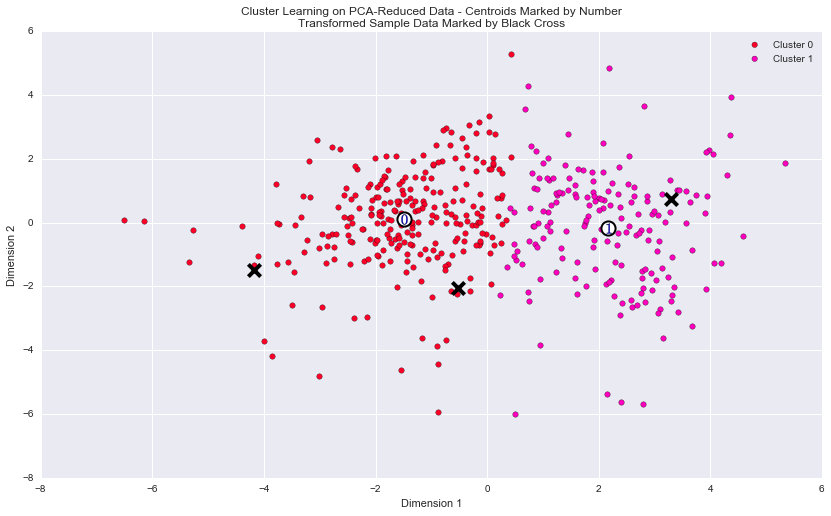

In [79]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2279.0,562.0,-522.0,-285.0
Segment 1,-4499.0,4273.0,7348.0,-574.0,3745.0,70.0


Sample '0':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,8867.000000,1897.000000,2477.000000,2088.000000,294.000000,681.000000
MEAN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
DIFF,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455
DIFF_PERC,-26.110167,-67.272033,-68.847772,-32.029741,-89.796957,-55.340469


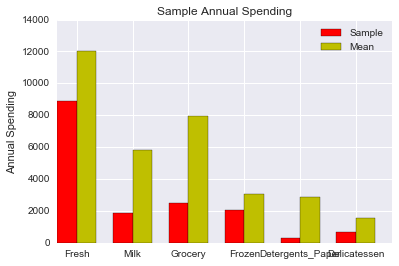

Sample '1':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
SAMPLE,4005.000000,7900.000000,12104.000000,952.000000,4561.000000,1036.000000
MEAN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
DIFF,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455
DIFF_PERC,-66.625828,36.294644,52.227115,-69.009729,58.285990,-32.059802


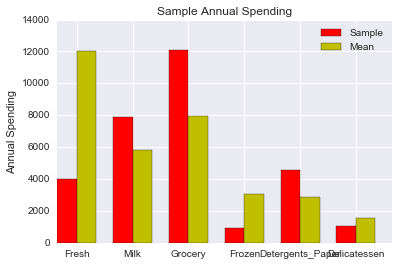

In [80]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

display(true_centers)
display(data.mean())

display(true_centers - np.round(data.mean()._values))
display((true_centers - np.round(data.median()._values)))

for index in range(0,2):

    print "Sample '{}':".format(index)
    agg_data = pd.DataFrame(columns=data.keys())
    agg_data.loc['SAMPLE'] = true_centers.iloc[index]
    agg_data.loc['MEAN'] = data.describe().loc['mean']
    agg_data.loc['DIFF'] = agg_data.loc['SAMPLE']-agg_data.loc['MEAN']
    agg_data.loc['DIFF_PERC'] = 100*agg_data.loc['DIFF']/agg_data.loc['MEAN']
    display(agg_data)

    N = 6
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, agg_data.loc['SAMPLE'], width, color='r')
    rects2 = ax.bar(ind + width, agg_data.loc['MEAN'], width, color='y')


    # add some text for labels, title and axes ticks
    ax.set_ylabel('Annual Spending')
    ax.set_title('Sample Annual Spending')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(samples.keys())

    ax.legend((rects1[0], rects2[0]), ('Sample', 'Mean'))

    plt.show()


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**: 

Point 0 has all spending values under the mean but if they are compared with the median, it can be seen that only Fresh and Frozen are over it. Besides that, it has negative contributions in other features and that makes sense if each feature is compared with each weight in the First Principal Component. 

In addition, the positive weighted features in the First PC are over the median in Point 2. The FPC describes the direction where that linear combination has maximal variance and the center of both clusters are perfectly represented by their values and signs.

Point 0: comparing values vs mean, the most important budgets for this customer are Fresh, Frozen and Deli so this could be a restaurant or an hotel

Point 1: in this case Grocery, Detergents_Paper and Milk are the most relevant features so it seems like this one could be a retailer.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [81]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**: 

For Point 0 and 1, the values for 'Fresh', 'Frozen', and 'Deli' mimic the Cluster 1 center so it makes sense to say that both samples are represented in the same cluster at the same time that this cluster is different of the Point 2 one. Point 0 and Point 1 were described as a Café, Restaurant, Juice Shop, or similar and the Cluster 1 Center was described as Restaurant or Hotel so it could be said that this Cluster represents the restaurant/hotel industry group.

Nevertheless, Point 2 was described as a Retailer and the prediction is completely consistent. The Values 'Grocery', 'Milk', and 'Detergents_Paper' tend to be similiar to the Cluster 2 Center ones so in this case, it could be said that Cluster 2 represents the Retail Industry.

Two big groups have been discovered: Restaurant/Hotel industry and Retail.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**: In this case, it makes sense to test this delivery service in segment 1 (retailers) first. Customers of Restaurant/Hotel Industry are used to buying more Fresh and Frozen products so it could be reasonable to test that "worse" delivery service in retailers at first.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**: It could be a good idea to use the labels from the clustering as a new input for a supervised learner.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

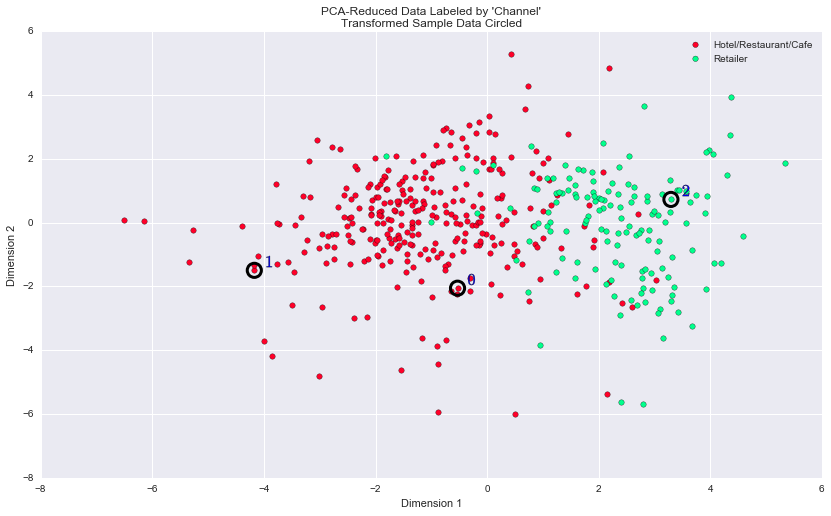

In [82]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**: The K-Means algorithm with 2 clusters describes very well the underlying distribution of HoReCa customers and Retailer ones. It can be perfectly seen two separated clusters. Besides that, the sample points are represented and predicted correctly.

The described segments are consistent with all the clustering process that it has been done. I have been able to discover two different patterns from the spending features and it is finally possible to check that these two groups have a perfect representation as HoReCa and Retailers.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.